# Mathematical Biology - Week 2

Armed with the tools described above we can begin to analyse the mathematical models of biological processes that are one dimensional systems.

## Population growth 

One of the most classical applications of mathematics in biology is population dynamics, where the model is intended to predict the growth or decay of a population of organisms (we'll get to which ones in a bit) over time. 

### Exponential growth ###

First, let's imagine that the population size is given by the smooth function of time, $x(t)$.  We assume in describing its dynamics that the population is already sufficiently large that stochastic fluctuations in organism numbers are small relative to the size of the population.  Additionally, we assume that changes in the population size can only occur through birth and death.  This is known as a closed population as migration (another mechanism for a population to change its size) to and from other populations is prohibited.  Thus, knowing the birth and death rates, we can obtain an equation for the population density. 

In formulating the birth and death rates, we need to make a few assumptions, the first of which will be that the rate of birth is proportional to the number of organisms.  Based on this, if the population size at time $t$ is $x(t)$, then the number of new births that occur over from time $t$ to $t + \tau$ is approximately $bx\tau$, where $b \geq 0$ is the (constant) per capita birth rate.  Similarly, we will assume that the number of deaths is also proportional to $x(t)$ and therefore the number of deaths that occur from time $t$ to $t + \tau$ is approximately $\mu x\tau$, where $\mu \geq 0$ is the (constant) per capita death rate.  Putting this all together, we have that 
\begin{align*}
x(t + \tau) - x(t) = (b - \mu)\tau x + O(\tau^2).
\end{align*}
Dividing through by $\tau$ and taking the limit as $\tau \rightarrow 0$, we obtain the familiar linear differential equation
\begin{align}
\frac{dx}{dt} = r x, 
%\label{eq:expgrow}
\end{align}
where $r = b - \mu$ is the net growth rate.  For the initial condition $x(0) = x$, the solution is 
\begin{align*}
x(t) = x_0e^{rt}
\end{align*}
and we obtain exponential growth if $r > 0$ (birth rate exceeds the death rate) and exponential decay if $r < 0$ (death rate exceeds the birth rate).  In terms of the population dynamics, we see that there are just two outcomes at $t \rightarrow \infty$ -- either the population grows without bound, or it dies out completely, there is no middle ground!

This view was that originally observed by Malthus in 1798 who predicted that the exponential growth in population would spell disaster as the rate of food production would not be able to keep pace with population growth.  Given the gravity of what this model predicts, questioning its validity is warranted, if not encouraged!  Are the constant birth and death rates per capita reasonable assumptions?  Have we taken into account all necessary factors?  

### Logistic growth 

It turns out that while populations are often seen to grow exponentially at first, the growth rate changes over time and is seen to decrease as the population size increases.  The simplest assumption that one can make is that the growth rate decreases linearly with the population size $r(1 - x/K)$ where $r > 0$ is the growth rate for very small populations ($x \approx 0$) and $K > 0$ is the population size at which the growth rate is zero.  In this context, $r$ is referred to as the *intrinsic growth rate*, a name which should be evident from our previous statement.  The parameter $K$ is called the *carrying capacity* and we will see why shortly!

Replacing the growth rate in (9) by $r(1 - x/K)$, we arrive at the **logistic equation** (with associated initial condition)

\begin{align}
\frac{dx}{dt} &= r x\left(1 - \frac{x}{K}\right),\quad
x(0) = x_0, 
%\label{eq:logistic}
\end{align}

attributed to Verhulst who introduced it in 1838.  This change to logistic growth yields a nonlinear differential equation with a quadratic nonlinearity.  Despite this, an analytical solution is possible.  Perhaps this is why it is such a fundamental model!

Applying separation of variables to equation (10), we obtain

\begin{align}
\int_{x_0}^x \frac{dy}{y(K - y)} = \int_{0}^t \frac{r}{K} d\tau.
\end{align}

Using partial fractions to write

\begin{align*}
\frac{1}{y(K - y)} &= \frac{1}{K}\left(\frac{1}{y}+\frac{1}{K - y}\right),
\end{align*}

the integrals above yield

\begin{align*}
\frac{1}{K}\left(\log x - \log (K - x) \right) - \frac{1}{K}\left(\log x_0 - \log (K - x_0) \right) = \frac{r}{K} t.
\end{align*}

After some algebraic manipulation to solve of $x$, we arrive at the solution

\begin{align}
x(t) = \frac{K x_0}{x_0 + (K - x_0)e^{-rt}}
%\label{eq:logisticsol}
\end{align}

Solutions can be plotted using the code here.


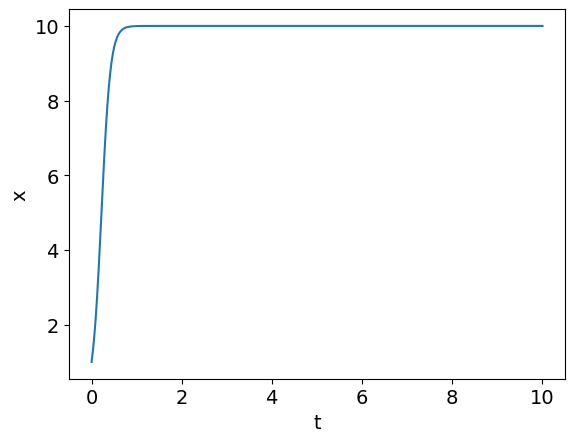

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x0 = 1.0
r = 10.0
K = 10.0
t = np.linspace(0,10,1000)
x = K*x0/(x0 + (K - x0)*np.exp(-r*t))

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("x")
plt.plot(t,x);


Let's look more closely now at what has changed from our picture before where we had exponential growth.  Recalling that $r$ is a positive constant, we see that $x \rightarrow K$ as $t \rightarrow \infty$.  Now we see why $K$ is called the carrying capacity.  It refers to the population size that can be maintained by the available resources.  This is illustrated through by following problem:  

*Suppose that the growth rate of a population is $r = aC$, where $C(t)$ is the concentration of nutrients.  Suppose that at $C(0) = C_0$ and that $dC/dt = -(1/b)dx/dt$, i.e. consumption of a unit of nutrient produces $b$ units of population size.  Show that $x$ obeys the logistic equation.  What are the expressions for $r$ and $K$?*

At this point, its worth revisiting what we mean by 'organism.'  As you might imagine, such a simple equation would capture what happens with very simple organisms.  These include micro-organisms that reproduce by dividing and rely on nutrients that are more or less distributed uniformly throughout the population.  The population size of other, more complex organisms, such as plants, animals and people, will likely depend on many more factors such as competition, predation and mutualism, and a more refined breakdown of the population, for example the age structure.  Nevertheless, we will see that logistic growth is an important ingredient in many models arising in mathematical biology.

**Fixed points** 

It's worth noting that despite being a nonlinear equation, we were able to obtain a solution to the logistic equation via separation of variables.  Despite having the solution, it's worth pretending that we don't explore what happens utilising some of the analytical techniques for nonlinear one-dimensional systems outlined above.  

Let's start off by finding the fixed points of equation (7).  Considering $f(x) = rx(1 - x/K) = 0$, one finds fixed points $x^* = 0$ and $x^* = K$.  Given the quadratic nature of $f(x)$ and since $r > 0$, we see that $f > 0$ for $0 < x < K$ and $f < 0$ for $x > K$.  Thus, $x^* = 0$ is unstable, while $x^* = K$ is stable.  This can be shown graphically using the code below

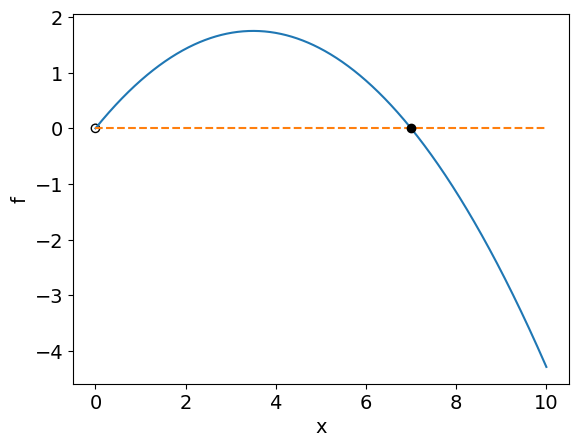

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

r = 1.0
K = 7.0
x = np.linspace(0,10,1000)
f = r*x*(1 - x/K)

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("f")
plt.plot(x,f);
plt.plot(x,0*f,'--')
plt.plot(K,0,'ko');
plt.scatter(0,0, edgecolor="black", color="none");

## The logistic equation in epidemiology: SIS model

For many diseases, such as meningitis, plague, malaria, and venerial diseases, populations can be divided into two types -- those that are susceptible and those that are infective.  This is in contrast to viral diseases where there is a third category of the population that has immunity, but more on that later.  Here, we call the size of the susceptible population, $S$, and the infective population, $I$ and the total population size, $N$, where $S + I = N$.  We assume that the birth and death rates are equal and both given by $\delta$ and that all newborns are susceptible.  While this means that $N$ is constant and the rate of change of $S$ and $I$ due to deaths is $-\delta S$ and $-\delta I$, respectively, while births only affects $S$ with the rate of change, $\delta N$.  Additionally, the rate at which the susceptible population becomes infective is $-\lambda S I/N$, while the rate at which the infective population returns to be susceptible due to recovery is $-\gamma I$.  Putting everything together, we have 
\begin{align}
\frac{dS}{dt} &= -\lambda S I/N + \gamma I + \delta N - \delta S, \\
\frac{dI}{dt} &= \lambda S I/N - \gamma I - \delta I, \\
N &= S + I.
\end{align}
This is called the **SIS model**.  Notice that the terms $-\lambda S I/N$ and $\gamma I$ in the equation for $S$ appear in the equation for $I$, but with the opposite sign.  This reflects the fact that those that are no longer infective must become susceptible, and similarly, those that were susceptible become infective.  

Something else to notice is that this does not appear to be a one dimensional system as there are two differential equations, one for $I$ and one for $S$.  However, by virtue of the fact that $N$ is constant, we know once we know $I$, we can immediately find $S$ through $S = N - I$.  Using this fact, the differential equation for $I$ becomes,
\begin{align}
\frac{dI}{dt} &= \lambda (1 - I/N) I - \gamma I - \delta I,
\end{align}
which can be written as 
\begin{align}
\frac{dI}{dt} &= (\lambda - \gamma - \delta) I \left(1 - \frac{\lambda}{N(\lambda  - \gamma - \delta)}I\right), 
\end{align}
and thus recover the logistic equation with $r = \lambda  - \gamma - \delta$ and $K = N (\lambda  - \gamma - \delta)/\lambda$.  Knowing what you know about the solution to the logistic equation and what the parameters $\lambda$, $\gamma$, $\delta$ and $N$ represent, what does the SIS model predict about the infective population?

### Logistic growth with harvesting

Recall that one of the many assumptions made is that our system is closed -- the population changes solely as a result of birth or death.  We can relax this assumption through a simple modification of the logistic equation that accounts for *constant-rate harvesting*.  This modified logistic equation is given by 

\begin{align}
\frac{dx}{dt} &= r x\left(1 - \frac{x}{K}\right) - H 
\label{eq:logisticH}
\end{align}

where $H$ is the harvesting rate.  We find the fixed points of \eqref{eq:logisticH} by considering $f(x) = rx (1 - x/K) - H = 0$.  The solutions to this quadratic equation are 

\begin{align}
x^*_{\pm} = \frac{K \pm \sqrt{K^2 - 4HK/r}}{2}.
\end{align}

For $H > rK/4$, the roots are complex and hence no fixed points, though there is still an outcome, just a catastrophic one!  For this case $f(x) < 0$ for all $x$, and hence we will reach $x = 0$ in a finite time -- the population will die out.  This is certainly catastrophic for the population, however, the catastrophe that I am referring to is the mathematical one.  We see that if we start at $H < rK/4$ and slowly increase it, we will have a stable fixed point that approaches $x^* = K/2$.  The moment $H$ goes above $rK/4$, the fixed point disappears and we have the solution $x = 0$ at long time.  This discontinuous jump in the long time solution is known as a catastrophe.

Provided $H \leq rK/4$, there are two real roots and hence two fixed points with $x^*_+$ being asymptotically stable while $x^*_-$ is unstable.  This can be explained using linear stability analysis, or by examining for which values of $x$ is $r x(1 - x/K) - H$ is positive or negative.  

Hopefully, from our discussion above, you can see that saddle-node bifurcation has occurred at the bifurcation point $H = rK/4$, where we went from having two fixed points to suddenly having none.  All that has been discussed here is neatly summarised in the bifurcation diagram below with the added arrows indicating the flow for fixed $H$.

<img src="harvestingbifurcation.png" alt="bifurcation for logistic growth with harvesting" width="500"/>

## Insect outbreak: the spruce budworm 

One cannot take a mathematical biology course without encountering the spruce budworm.  It shows how a simple, one-dimensional systems can yield rich dynamics with relevant predictions of a biological phenomenon.  The spruce budworm is an insect that infects fir trees in eastern Canada and a budworm infestation can lead to complete defoliation of a forest in about 4 years.  The budworm is preyed upon by birds that for low budworm population feed only upon the budworms once the budworm population has reached a certain level.  Assuming logistic growth for the budworm population in the absence of birds, the budworm population size, $N$, is governed by the differential equation
\begin{align}
\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right) - p(N),
\end{align}
where $p(N)$ is the rate of change in the budworm population size due to predation by birds.  The predation can be described by the function $p(N) = BN^2/(A^2 + N^2)$ where $B > 0$ is the predation rate as $N \rightarrow \infty$ and $A > 0$ provides a measure of the threshold population size where predation suddenly increases.  This leaves us with
\begin{align}
\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right) - \frac{BN^2}{A^2 + N^2}.
\label{eq:budwormdim}
\end{align}

### Nondimensionalisation

Thus far we've dealt directly with the dimensional form of the differential equation, meaning that the variables parameters in the equations have relevant dimensions (or units) associated with them. For example,
in equation (\ref{eq:budwormdim}), $t$ has units of time, $r,B$ are rates (inverse times) and $,A,K$ are dimensionless.) Working with the dimensional forms is convenient for two reasons:

1. We can make direct predictions from measured values of the parameters

2. It provides a useful check in the case of complicated algebraic manipulations, since all terms in an equation must have the same dimensions.

However, there are some advantages to rescaling the variables and parameters so that they are non-dimensionalized:

1. Nondimensionalization often simplifies the equations by reducing the number of free parameters. (Even if a physical quantity is already dimensionless, it can still be useful to rescale.)

2. If a non-dimensional parameter $\epsilon$ is small irrespective of units, then one can often obtain an approximation solution in powers of $\epsilon$ (perturbation theory).

Suppose that we divide equation (\ref{eq:budwormdim}) by $B$ and rearrange the final term
\begin{align*}
\frac{1}{B}\frac{dN}{dt} = \frac{r}{B}N\left(1 - \frac{N}{K}\right) - \frac{N^2/A^2}{1 + N^2/A^2}.
\end{align*}
We then notice that we can eliminate the parameter $A$ in the final term by setting $x=N/A$. It follows that
\begin{align*}
\frac{A}{B}\frac{dx}{dt} = \frac{rA}{B}N\left(1 - \frac{A}{K}x\right) - \frac{x^2}{1 + x^2}.
\end{align*}
Finally, setting $R = rA/B$, $k = K/A$ and defining the dimensionless time variable $\tau=Bt/A$ we have an equation with 2 free parameters:

\begin{align}
\frac{dx}{d\tau} = Rx\left(1 - \frac{x}{k}\right) - \frac{x^2}{1 + x^2}.
\label{eq:budworm}
\end{align}


### Fixed points

We first note that by inspection of \eqref{eq:budworm}, $x = 0$ is a fixed point.  To find the other fixed points, we consider 

\begin{align}
R\left(1 - \frac{x}{k}\right) = \frac{x}{1 + x^2}
\label{eq:budwormFP}
\end{align}

where the logistic growth is balanced by the predation.  Thus, the fixed points occur when the line given by the left-hand side of \eqref{eq:budwormFP} intersects the curve given by the right-hand side.  Naturally, we'd like to explore how these fixed points vary with $R$ and $k$ and, in doing so, we see the benefit of our choice of nondimensionalisation.  The curve given by $h(x) = x/(1 + x^2)$ does not depend on either parameter, and as for the line $g(x) = R(1 - x/k)$, $R$ is the $y$-intercept, while $k$ is the where it crosses the $x$-axis.  This makes graphical evaluation quite easy!

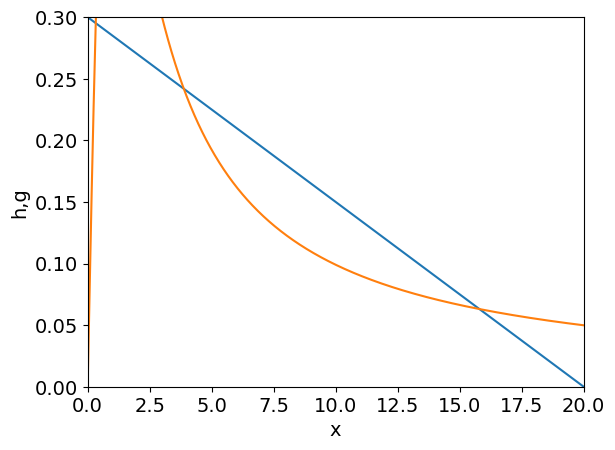

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

R = 0.3
k = 20.0
x = np.linspace(0,20,1000)
h = R*(1 - x/k)
g = x/(1 + x**2);

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("h,g")
plt.plot(x,h)
plt.plot(x,g)
plt.ylim(0,R)
plt.xlim(0,k);

The code above can be used to plot the curve $h(x)$ and the line $g(x)$ for different $R$ and $k$.  For values of $k$ sufficiently low, there will be a single additional fixed point for $R >0$.  When $k$ is large, however, we can have either one, two, or three additional fixed points.  Try it! Consider the case of three additional fixed points, labeled $a$, $b$ and $c$, such that $a < b < c$.  If we fix the value of $k$ and decrease $R$, we see that $b$ and $c$ collide and we go from three to one additional fixed point via a saddle-node bifurcation.  Similarly, by increasing $R$, $a$ and $b$ collide and we'll have a saddle-node bifurcation there as well.  


### Stability

We know that $x^* = 0$ is a fixed point, and since $f(x) > 0$ just to the right of $x^* = 0$, this is an unstable fixed point.  Now, turning our attention to the case where we have three additional fixed points, $a$, $b$, and $c$.  Since the stability of the fixed points must alternate as $x$ increases from $0$ (this is due to the continuity of $f$), $a$ and $c$ will be stable, while $b$ will be unstable.  

At this point, it's important to remember that this is a model of a biological process and the fixed points that we found have an interpretation in the context of the system.  The stable fixed points $x^* = a$ and $x^* = c$ correspond to the *refuge* and *outbreak* population levels, respectively.  The unstable fixed point $x^* = b$ is referred to as the *threshold* as initial populations $x_0 > b$ increase to the outbreak level, while for $x_0 < b$ the population will decrease to the refuge size.  We notice something important here -- the system exhibits bistability.  For a fixed set of parameters, we can have two stable fixed points.  

We can find the regions in $(k,R)$ parameter space where there is only 1 additional fixed point, or where there are 3 by finding parametric curves $R(x)$ and $k(x)$ that give the bifurcation curves -- the curves containing the bifurcation points.  These are obtained by considering simultaneously $f(x) = 0$ and $f'(x) = 0$, which state that the bifurcation point correspond to a fixed point, and it occurs where the tangent to the curve is zero, i.e. where the line given by $R(1 - x/k)$ is tangent to the curve $x/(1+x^2)$.  Performing this calculation, we find that $R(x) = 2x^3/(1+x^2)^2$ and $k(x) = 2x^3/(x^2 - 1)$.  The code below plots these curves and indicates the number of fixed points in each region.

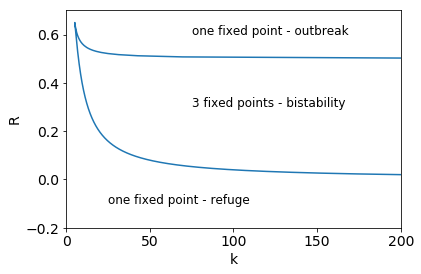

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.linspace(1.005,100,10000)
R = 2*x**3/(1 + x**2)**2;
k = 2*x**3/(x**2 - 1)

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("k")
plt.ylabel("R")
plt.plot(k,R);
plt.ylim(-0.2,0.7)
plt.xlim(0,200);
plt.text(75, 0.6, "one fixed point - outbreak", fontsize=12)
plt.text(75, 0.3, '3 fixed points - bistability', fontsize=12)
plt.text(25, -0.1, 'one fixed point - refuge', fontsize=12);


How did we do with our analysis: use the code below to integrate the equations numerically and plot the solution as a function of time.  If you vary the parameters, does the solution go to where you think it should?

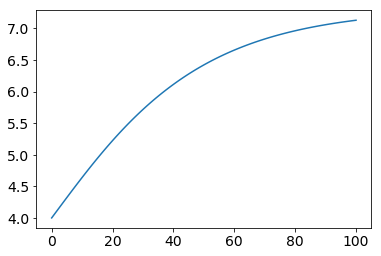

In [3]:
from scipy.integrate import odeint

def dx_dt(x, t):
    R = 0.5
    k = 10.0
    f = R*(1 - x/k)
    g = x/(1 + x**2);
    return f-g

t = np.linspace(0,100,100)
x0 = 4.0  # the initial condition
x = odeint(dx_dt, x0, t)
x = np.array(x).flatten()

plt.plot(t,x);


One important feature of this system is that it can exhibit *hysteresis* meaning that varying the parameters in such a way that they return to their initial values does not return the system to its original state.  

For example, suppose that the parameters $R$ and $k$ are such that we have four fixed points (including $x^*=0$).  Let's suppose that the population is at the refuge size, $x = a$.  Now, imagine that $R$ is increased and the saddle-node bifurcation occurs making $x^* = c$ the only stable fixed point.  The system will move to the outbreak size.  Even if we reduce $R$ to its original value, we will be above the threshold and continue to move to $c$ rather than $a$.  Thus, once the outbreak occurs, reducing $R$ to its original value won't solve the problem.  How might you go about returning the population of the refuge value? 

<img src="hysteresis.png" alt="hysteresis in the spruce budworm model" width="500"/>

## Chemical kinetics 

While most of what we have discussed so far describes biological processes at the scale of populations of many organisms, similar equations arise for basic chemical processes that occur at the molecular level.  Additionally, the connection with a chemical process provides a more systematic way of producing a mathematical model given specific chemical reaction.

Suppose we have two molecules, $A$ and $B$, that react to form another molecule $C$ at rate $k_1$.  This is expressed symbolically as

\begin{align}
A + B \xrightarrow{k_1} C.
\end{align}

Writing the concentration of the molecules as $a = [A]$, $b = [B]$, and $c = [C]$, the *law of mass action* tells us that the reaction rate is proportional to the product of the concentration of the reactants.  In this case, we'll have 
\begin{align}
\frac{dc}{dt} = k_1 a b
\end{align}

and the depletion rates of $a$ and $b$ are

\begin{align}
\frac{da}{dt} = -k_1 a b, \frac{db}{dt} = -k_1 a b.
\end{align}

Now, suppose instead, the reaction is such that one $A$ combines with two $B$ to form one $C$ with a rate $k_1$, 

\begin{align}
A + 2B &\xrightarrow{k_1} C.
\label{eq:abc}
\end{align}

In this case, the law of mass action states that dynamics of the concentrations are 
\begin{align}
\frac{dc}{dt} &= k_1 a b^2,\\
\frac{da}{dt} &= -k_1 a b^2,\\
\frac{db}{dt} &= -2k_1 a b^2.
\end{align}
The coefficients (1,2,1) in front of $A$, $B$, and $C$ in \eqref{eq:abc} are referred to as *stoichiometric coefficients*.  If this reaction is reversible with rate $k_2$ such that 
\begin{align}
C &\xrightarrow{k_2} A + 2B,
\end{align}
the differential equations for the concentrations are

\begin{align}
\frac{dc}{dt} = k_1 a b^2 - k_2 c, \frac{da}{dt} = k_2 c - k_1 a b^2, \frac{db}{dt} = 2k_2 c - 2k_1 a b^2.
\end{align}

Hopefully, from this simple example, you've noticed that there is a process for going from the symbolic representation of the chemical reactions to the differential equations for the dynamics of the concentrations.  Let's state the process more generally.  

Suppose there are $n$ molecules, or chemical species, $X_1, \dots, X_n$ with concentrations, $x_1, \dots, x_n$, respectively.  Suppose also that the molecules can undergo $r$ reactions, each of which may be expressed as

\begin{align}
s^R_{1j}X_1+s^R_{2j}X_2+\dots +s^R_{nj}X_n \xrightarrow{k_j} s^P_{1j}X_1+s^P_{2j}X_2+\dots +s^P_{nj}X_n
\end{align}

for $j = 1,\dots, r$, where $s^R_{ij}$ and $s^P_{ij}$ and are the stoichiometric coefficients on the reactant and product sides, respectively for species $i$ and reaction $j$.  Writing $s_{ij} = s^P_{ij} - s^R_{ij}$, the law of mass action gives the differential equation for the concentration $x_i$ as 

\begin{align}
\frac{dx_i}{dt} = \sum_{j=1}^rs_{ij} k_j\prod_{l=1}^nx_l^{s^R{lj}},
\end{align}

for $i = 1,\dots,n$.  


### Enzyme dynamics: Michaelis-Menten model 

Now that we have the general framework for obtaining differential equations from chemical reactions, let's consider an enzymatic reaction.  The biochemical reactions that are taking place within organisms often involve proteins called *enzymes* that serve as catalysts to efficiently facilitate the reaction.  The enzymes react selectively on compounds that are referred to as *substrates*.  Haemoglobin on red blood cells is an example of an enzyme that combines with its substrate, oxygen.  Enzymes are important as they often serve as activators or inhibitors of reactions that govern fundamental biological process, such as metabolism, the process by which energy is made available within cells.

The most basic model enzymatic reaction is the process proposed by Michaelis and Menten (1913), involving substrate $S$ and enzyme $E$, that combine to form complex $SE$ which, in turn is converted to product, $P$, releasing the enzyme.  This reaction is described by

\begin{align}
S + E \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} SE \xrightarrow{k_2} P + E
\end{align}

Applying mass action to the process described above and calling $c = [SE]$, the differential equations for the concentrations are

\begin{align}
\frac{dc}{dt} &= k_1 s e - (k_{-1} + k_2)c,\\
\frac{de}{dt} &= -k_1 s e + (k_{-1} + k_2)c,\\
\frac{ds}{dt} &= -k_1 s e + k_{-1}c,\\
\frac{dp}{dt} &= k_2c.
\end{align}

From this set of equations, we notice a couple of things.  The first is that $d(c + e)/dt = 0$, and therefore, if at $t = 0$, $e(0) = e_0$ and $c(0) = 0$, we have $c + e = e_0$.  The second thing to notice is that since the equation for $p$ only depends on $c$, we have

\begin{align}
p(t) - p(0) = k_2 \int_{0}^t c(\tau) d\tau.
\end{align}

Thus, once we know $c$, $p$ immediately follows through integration -- there's nothing to solve for!

Therefore, we need only consider the two coupled differential equations

\begin{align}
\frac{dc}{dt} &= k_1 e_0 s  - (k_1s + k_{-1} + k_2)c,\\
\frac{ds}{dt} &= -k_1 e_0 s + (k_1s + k_{-1})c
\end{align}

with the initial condition $s(0) = s_0$ and recall $c(0) = 0$.  

### Nondimensionalisation

First note that $c$ and $s$ have units of concentration (number of molecules per unit volume). Moreover, $k_{-1},k_2$ have units of [time]$^{-1}$ whereas $k_1$ has units of [time $\times$ conc]$^{-1}$. We nondimensionalise this system of differential equations as follows

\begin{align}
t = \tau/(k_1e_0), s = s_0 u, c = e_0v 
\end{align}

to become

\begin{align}
\epsilon\frac{dv}{d\tau} &= u - (u + K)v,\\
\frac{du}{d\tau} &= -u + (u + K - \lambda)v ,
\label{ah}
\end{align}

where $\epsilon = e_0/s_0$, $K = (k_{-1} + k_2)/(k_1 s_0) = K_m/s_0$ and $\lambda = k_2/(k_{1}s_0)$.  The initial conditions for the nondimensional system are $u(0) = 1$ and $v(0) = 0$.  

### Quasi-steady approximation

Now, you must be thinking -- this is not a one-dimensional system, the dynamics are governed by two ODEs!  This is most certainly correct, but the reason that it is appearing now is that the nondimensionalisation has revealed that a simplifying assumption might be possible.  If the initial concentration of enzyme is small relative to that of the substrate, we have that $\epsilon \ll 1$ and assuming the remaining coefficients are $O(1)$, we can take $\epsilon = 0$ and the system becomes

\begin{align}
0 &= u - (u + K)v,\\
\frac{du}{d\tau} &= -u + (u + K - \lambda)v. 
\end{align}

We can immediately solve the algebraic equation to give $v = u/(u + K)$ and upon substituting this into the differential equation, we have the one-dimensional system

\begin{align}
\frac{du}{d\tau} &= -\lambda\frac{u}{u+K}. 
\end{align}

Examining the right-hand side, we see that $f = -\lambda u/(u+K) < 0$ and thus $u$ monotonically decreasing.  We also see that $u = 0$ is an asymptotically stable fixed point.  
The solution can be obtained via separation of variables,

\begin{align}
\int_1^u \left(1 + \frac{K}{u'}\right) du' = -\lambda \tau.
\end{align}

to obtain

\begin{align}
u + K \log u = 1 - \lambda \tau.
\end{align}

One final thing to consider is the product itself.  If we consider the equation for $p$ and nondimesionalise such that $p = s_0 w$, we obtain

\begin{align}
\frac{dw}{d\tau} &= \lambda\frac{u}{u+K}. 
\end{align}

which tells us the product increases monotonically in time with a rate that decreases as the substrate $u$ is depleted.

As you can see, the approximation $\epsilon = 0$ can be quite useful, but have a look at our expression $v = u/(u + K)$.  If we take $\tau = 0$, we have $v(0) = (1+K)^{-1} \neq 0$ -- we haven't satisfied the initial condition for $v$.  What went wrong?  Looking more carefully, we see that in setting $\epsilon = 0$, we removed the dynamics of $v$ and insisted it must reach its quasi-steady state instantaneously.  In reality, we won't have $\epsilon = 0$, but rather a tiny, finite number, so there will be some dynamics but they will happen very quickly. That is, $dv/d\tau$ may be large compared to $du/d\tau$ so that $
\epsilon dv/d\tau$ is not small To capture this, we must instead consider the limit $\epsilon \rightarrow 0$ and perform a more involved asymptotic analysis of the problem.

Let us perform the rescaling $\widehat{\tau}=\tau/\epsilon$. Equation (\ref{ah}) becomes
\begin{align}
\frac{dv}{d\widehat{\tau}}&=u-(u+K)v ,\\
\frac{du}{d\widehat{\tau}}&=\epsilon \left (-u +(u+K-\lambda)v\right ).
\end{align}
Now taking the limit $\epsilon \rightarrow 0$, we see that on short timescales $du/d\widehat{\tau}=0$ and $u(\widehat{\tau})=1$. On the other hand, $v(\widehat{\tau})$ evolves according to the equation
\begin{equation}
\frac{dv}{d\widehat{\tau}}=(1-v)- Kv,
\end{equation}
which has the solution
\begin{equation}
v(\widehat{\tau})=\frac{1}{1+K}\left (1-e^{-(K+1)\widehat{\tau}}\right ).
\end{equation}
Thus $v\rightarrow 1/(1+K)$ as $\widehat{\tau}\rightarrow \infty$ on the fast time-scale, which matches the initial condition for $v$ on the slow timescale ($\tau=0$). Thus the two results match at $
\widehat{\tau}=\infty$ and $\tau=0$. Within the context of singular perturbation analysis, this is called asymptotic matching.